In [99]:
### PCA 알고리즘
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### 와인 데이터셋을 불러오고, 테스트셋으로 나눠주고,
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

### 데이터 전처리해줌

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [100]:
cov_mat = np.cov(X_train_std.T)
eigenvalue, eigenvector = np.linalg.eig(cov_mat)

eigenvalue
### numpy의 linear algebra 메서드에서 eig를 통해서 matrix의 eigenvalue, eigenvector 쌍을 리턴값으로 얻을 수 있음.

array([4.8427, 2.416 , 1.5485, 0.9612, 0.8417, 0.6621, 0.5183, 0.3465,
       0.3131, 0.1075, 0.2136, 0.1536, 0.1809])

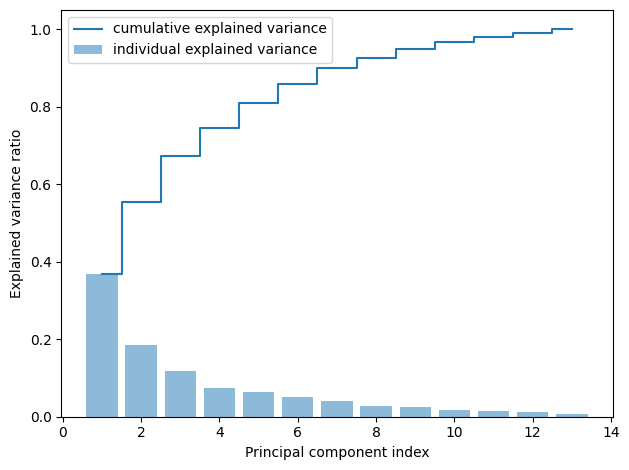

In [101]:
total = np.sum(eigenvalue)
explained_var = [(i / total) for i in sorted(eigenvalue, reverse=True)]

### cumsum은 누적합을 구하는 함수
cumsum_explained_var = np.cumsum(explained_var)

### 설명된 분산들을 고유값이 큰 순서대로 출력
plt.bar(range(1, 14), explained_var, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cumsum_explained_var, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### 그래프를 보면, 한 주성분이 6개정도면, 전체 데이터의 80퍼센트 조금 넘게를 표현 할 수 있음.

In [102]:
eigen_pairs = [(np.abs(eigenvalue[i]), eigenvector[:, i])
               for i in range(len(eigenvalue))]
### 각 고윳값과 고유벡터 쌍을 이루는 2차원 배열 만들어주고

#print(eigen_pairs)
eigen_pairs.sort(key=lambda k : k[0], reverse=True)
### 고윳값이 큰 순서대로 내림차순으로 정렬

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
### 차원을 내려주는 투영행렬 만들어주기
print(w)

[[-0.1372  0.503 ]
 [ 0.2472  0.1649]
 [-0.0255  0.2446]
 [ 0.2069 -0.1135]
 [-0.1544  0.2897]
 [-0.3938  0.0508]
 [-0.4174 -0.0229]
 [ 0.3057  0.0905]
 [-0.3067  0.0084]
 [ 0.0755  0.5498]
 [-0.3261 -0.2072]
 [-0.3686 -0.249 ]
 [-0.2967  0.3802]]


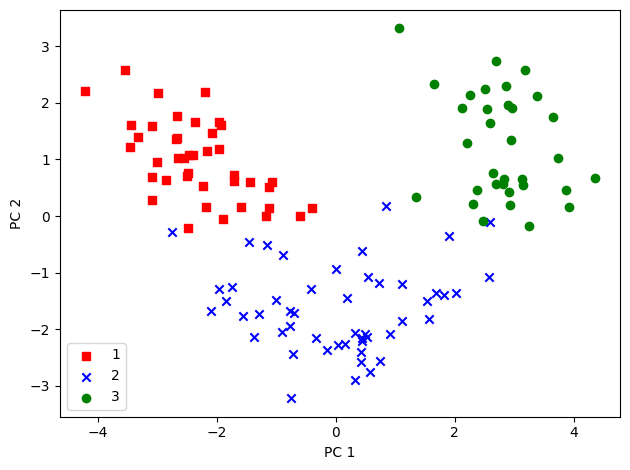

In [103]:
X_train_std[0].dot(w)
X_train_pca = X_train_std.dot(w)
### 변환된 데이터셋을 내적을 통해 두개의 주성분으로 변환 할 수 있음.

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
### 산점도를 나타내보면 2차원으로 그려지는걸 볼 수 있음.

In [104]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

pca.explained_variance_ratio_
### pca모델은 내장으로 설명된 분산들을 가지고있고, 이게 전체 데이터셋의 몇퍼센트를 표현하는지도 내장되어있음.

array([0.3695, 0.1843, 0.1182, 0.0733, 0.0642, 0.0505, 0.0395, 0.0264,
       0.0239, 0.0163, 0.0138, 0.0117, 0.0082])

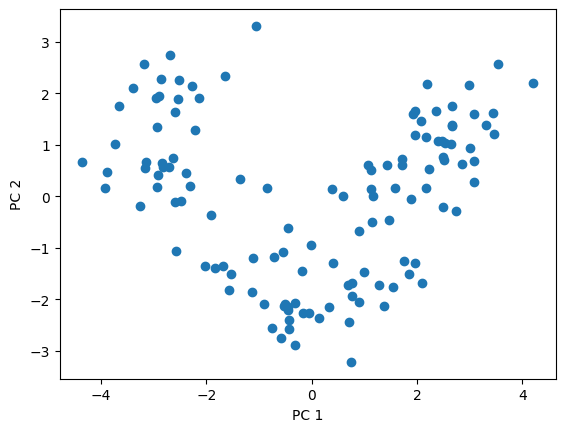

In [105]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
### PCA 모델 안에 n_components의 인자로 2를 주게되면, 2개의 주성분으로 변환을 해달라는 소리임.

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [106]:
### 앞 장에서 했던 경계 그리는 함수 다시 불러오기
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 준비합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 클래스 샘플을 표시합니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap.colors[idx],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

c:\Users\조승현\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\조승현\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\조승현\AppData\Local\Temp\ipykernel_23480\478810571.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl

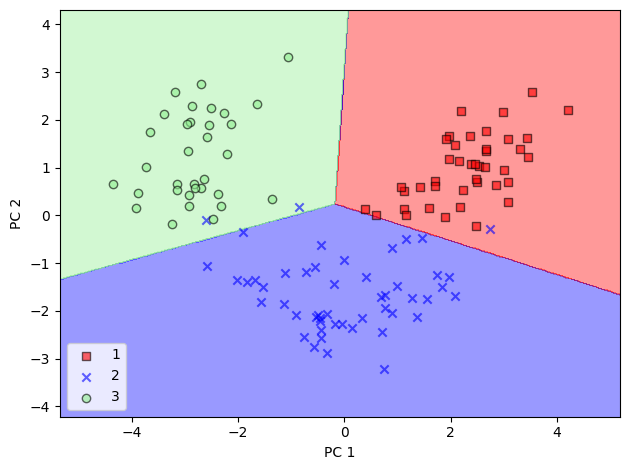

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

lr = LogisticRegression(solver='liblinear', multi_class='auto')
lr = lr.fit(X_train_pca, y_train)

### 로지스틱 회귀 모델로 변환된 데이터셋을 이용하여 훈련시키고, 결정 경계를 그려본다면?
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### 13차원에서 2차원으로 줄여도 거의 대부분을 잘 분류하는것을 볼 수 있음.

In [108]:
### LDA

np.set_printoptions(precision=4) ### 소수점 아래 4자리까지 설정
mean_vector = []
for label in range(1,4):
    mean_vector.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' %(label, mean_vector[label-1]))
    
### 1~3번째 클래스들의 각 샘플들의 평균값을 구하고 클래스별 벡터로 저장함

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [109]:
d = 13
S_W = np.zeros((d, d))

for label, mv in zip(range(1, 4), mean_vector):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter

print('클래스 내의 산포행렬 : %s x %s' %(S_W.shape[0], S_W.shape[1]))
print('클래스 레이블 분포: %s' %np.bincount(y_train)[1:])

클래스 내의 산포행렬 : 13 x 13
클래스 레이블 분포: [41 50 33]


In [110]:
d = 13
S_W = np.zeros((d, d))

for label, mv in zip(range(1, 4), mean_vector):
    class_scatter = np.cov(X_train_std[y_train == label].T, bias=True)
    S_W += class_scatter
    
print('스케일 조정된 클래스 내의 산포 행렬: %s x %s' %(S_W.shape[0], S_W.shape[1]))

스케일 조정된 클래스 내의 산포 행렬: 13 x 13


In [117]:
'''
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)

d = 13
S_B = np.zeros((d, d))
for i, mean_vector in enumerate(mean_vector):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vector = mean_vector.reshape(d, 1)
    S_B += n * (mean_vector - mean_overall).dot((mean_vector - mean_overall).T)

#print("클래스간의 산포행렬: %s x %s" %(S_B.shape[0], S_B.shape[1]))
print(S_B)
'''

mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)  # 열 벡터로 만들기
d = 13  # 특성의 수
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vector):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # 열 벡터로 만들기
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('클래스 간의 산포 행렬: %sx%s' % (S_B.shape[0], S_B.shape[1]))

클래스 간의 산포 행렬: 13x13


In [122]:

eigenvalue, eigenvector = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

eigen_pair = [(np.abs(eigenvalue[i]), eigenvector[:, i]) for i in range(len(eigenvalue))]
eigen_pair = sorted(eigen_pair, key=lambda k: k[0], reverse=True)

print("고유값 내림차순")
for eigenv in eigen_pairs:
    print(eigenv[0])

고유값 내림차순
358.00420701336594
177.07768640666228
3.862393199860557e-14
2.4383852781506664e-14
2.4383852781506664e-14
2.2271360487987997e-14
2.1646749597497108e-14
2.1646749597497108e-14
8.649059763727105e-15
6.501931494761382e-15
6.501931494761382e-15
2.151979961113958e-15
0.0


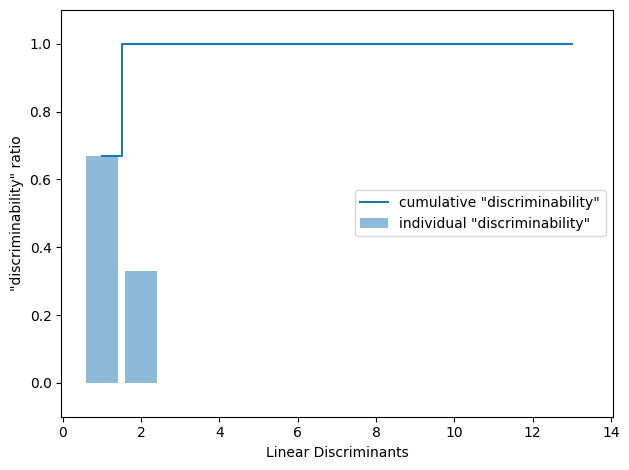

In [123]:
total = sum(eigenvalue.real)
discr = [(i / total) for i in sorted(eigenvalue.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
w = np.hstack((eigen_pair[0][1][:, np.newaxis].real,
               eigen_pair[1][1][:, np.newaxis].real))
w
### 두 벡터를 합쳐서 변환행렬 만들기

array([[-0.1484, -0.4093],
       [ 0.091 , -0.1583],
       [-0.0168, -0.3536],
       [ 0.1487,  0.322 ],
       [-0.0165, -0.0813],
       [ 0.1912,  0.0841],
       [-0.7333,  0.2828],
       [-0.0751, -0.0099],
       [ 0.002 ,  0.0902],
       [ 0.2953, -0.2168],
       [-0.0327,  0.274 ],
       [-0.3539, -0.0133],
       [-0.3918, -0.5954]])

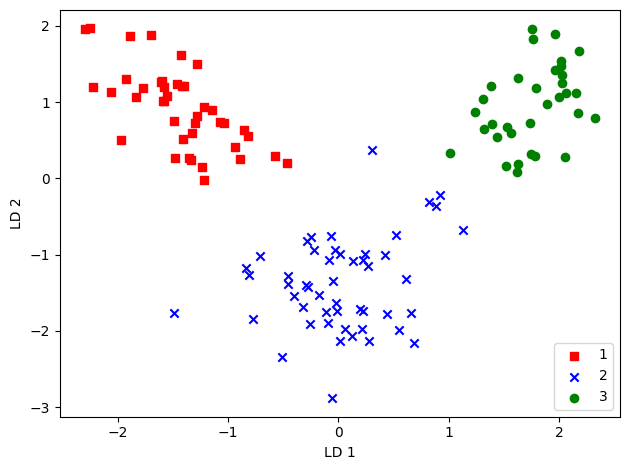

In [126]:
X_train_lda = X_train_std.dot(w)

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

c:\Users\조승현\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\조승현\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\조승현\AppData\Local\Temp\ipykernel_23480\478810571.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl

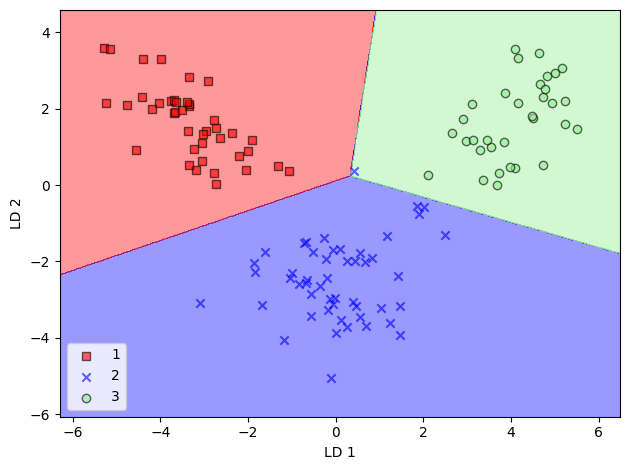

1.0


C:\Users\조승현\AppData\Local\Temp\ipykernel_23480\478810571.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


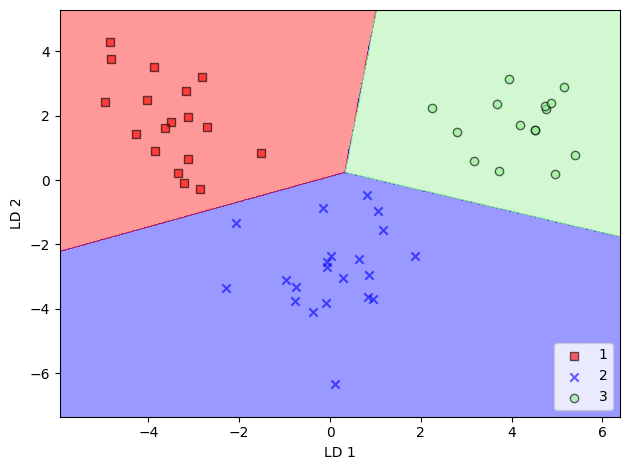

In [ ]:
### 쌩 구현이 아닌 sklearn에서 지원하는 LDA를 이용하여 Logistic Regression으로 분류해보기
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression as LR

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

lr = LR(solver='liblinear', multi_class='auto')
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### 13차원을 2차원으로 줄였는데도 불구하고, 1개의 샘플 빼고는 전부 잘 분류한걸 볼 수 있음.

X_test_lda = lda.transform(X_test_std)
print(lr.score(X_test_lda, y_test))

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### 테스트 데이터는 완벽하게 모두 분류함!


In [131]:
### 커널 PCA

from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh

def rbf_kernal_pca(X, gamma, n_component): # 밑바닥부터 구현하는 rbf 커널
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    
    K = np.exp(-gamma * mat_sq_dists)
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    eigenvalue, eigenvector = eigh(K)
    eigenvalue, eigenvector = eigenvalue[::-1], eigenvector[:, ::-1]
    
    X_pc = np.column_stack([eigenvector[:, i] for i in range(n_component)])
    
    return X_pc

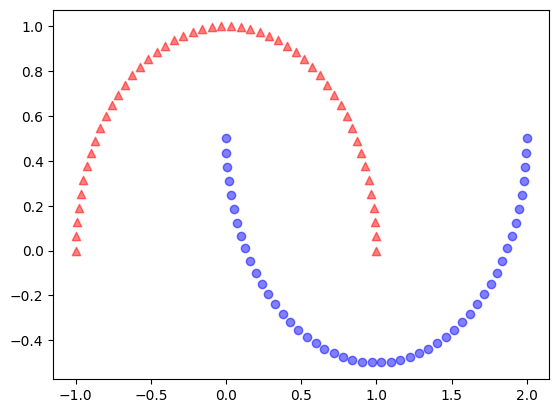

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.show()

### 선형 분류로는 절대 못푸는 전형적인 반달모양의 두 데이터셋이 있음.

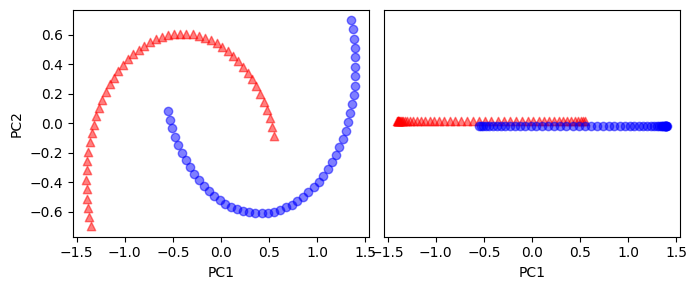

In [133]:
from sklearn.decomposition import PCA

### 그냥 단순히 pca만으로는 선형 분류가 안됨..
pca = PCA(n_components=2)
X_spca = pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

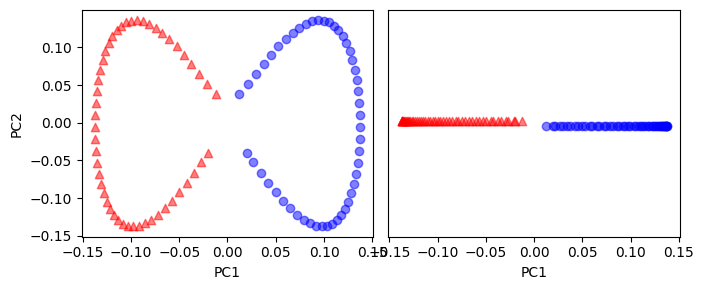

In [ ]:
X_kpca = rbf_kernal_pca(X, gamma=15, n_component=2)

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], 
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, 
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

### 가우시안 커널로 고차원으로 투영시키지 않고 고차원에서 내적한걸 바로 뽑아내어 투영한 효과를 볼 수 있음!
### 고차원에서는 선형분리가 잘 되는걸 볼 수 있음.


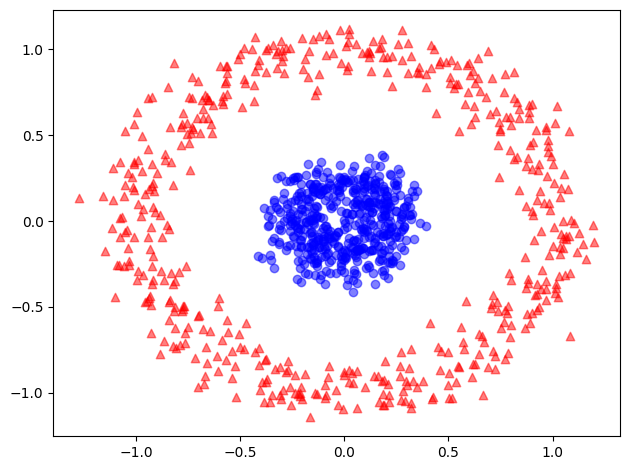

In [ ]:
### 반달 데이터셋 외에도 동심원 데이터셋에도 동일하게 적용 할 수 있음.

from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
plt.show()

### 이런 동심원으로서 선형 경계로 절대 클래스를 분류 할 수 없음

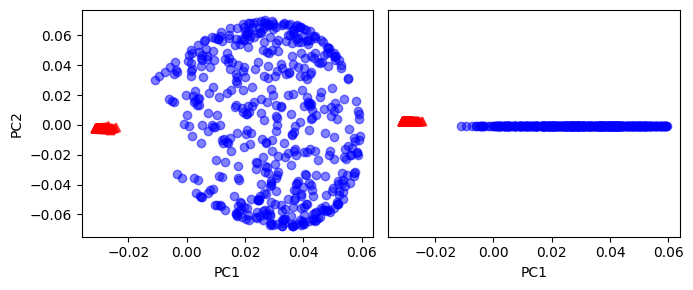

In [ ]:
### sklearn의 기본 PCA는 이 점을 분류 할 수 없고, 똑같이 가우시안 커널을 통해서 고차원의 내적을 계산해보면,

X_kpca = rbf_kernal_pca(X, gamma=15, n_component=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.show()

### 고차원으로 투영시켰을땐 선형 경계로 나눌 수 있고, 이걸 PCA를 통해 1차원으로 투영시키면, 클래스를 아주 잘 분류할 수 있음.

In [144]:
### 여러개의 데이터셋 가우시안 커널로 투영 시키기

def gaussian_kernal(X, gamma, n_components):
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    
    K = np.exp(-gamma * mat_sq_dists)
    
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    eigenvalue, eigenvector = eigh(K)
    eigenvalue, eigenvector = eigenvalue[::-1], eigenvector[:, ::-1]
    
    alphas = np.column_stack([eigenvector[:, i] for i in range(n_components)])
    lambdas = [eigenvalue[i] for i in range(n_components)]
    
    return alphas, lambdas

In [152]:
### 똑같이 반달 데이터 만들어보고 판단해보기
X, y = make_moons(n_samples=100, random_state=123)

alphas, lambdas = gaussian_kernal(X, gamma=15, n_components=1)

### 원본 투영 재현해보기
x_new = X[25]
x_proj = alphas[25]

def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    
    return k.dot(alphas / lambdas)

x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj

array([0.0788])

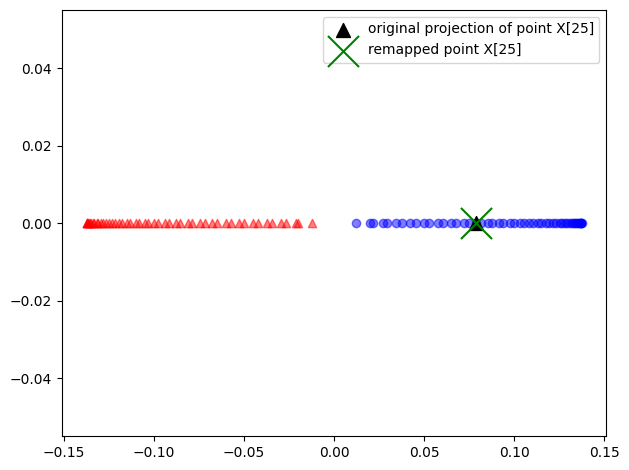

In [153]:
plt.scatter(alphas[y == 0, 0], np.zeros((50)),
            color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y == 1, 0], np.zeros((50)),
            color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black',
            label='original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green',
            label='remapped point X[25]', marker='x', s=500)
plt.legend(scatterpoints=1)

plt.tight_layout()
plt.show()

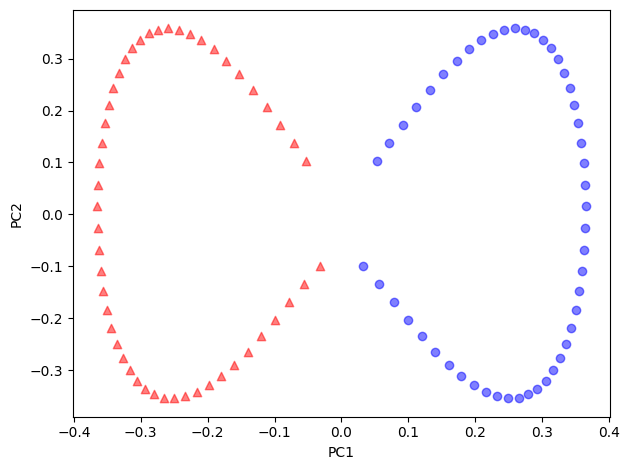

In [ ]:
### sklearn에 역시 커널 PCA도 지원함..

from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples=100, random_state=123)
kernalPCA = KernelPCA(n_components=2, kernel='rbf', gamma=15)

X_transformed = kernalPCA.fit_transform(X)

plt.scatter(X_transformed[y == 0, 0], X_transformed[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_transformed[y == 1, 0], X_transformed[y == 1, 1],
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

### 역시 매우 잘 분리되는걸 볼 수 있음.
